# Case Study :Uber Supply-Demand Gap Analysis 

The aim of analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation.

# 1. Read Request data and Data Inspection

In [62]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Read data 
uberrequest= pd.read_csv(r'D:\UG\EDA\UberAssignment\Uber Request Data.csv')
uberrequest.head(5)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.00,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.00,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.00,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.00,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.00,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [63]:
# Get stats of the data to understand the spread.
uberrequest.shape
# 6745 requests available. 

(6745, 6)

In [64]:
# check for duplicates
uberrequest.drop_duplicates(inplace=True, keep='first')

#Validate for the count again
uberrequest.shape
#NO duplicates found.

(6745, 6)

In [65]:
# Check for Null values 
uberrequest.isnull().sum()
# Driver ID & Drop Timestamp have null/Na values.

# Check if they are valid NA values.
navalues=uberrequest.loc[(pd.isna(uberrequest['Driver id'])) | (pd.isna(uberrequest['Drop timestamp']))]
navalues['Status'].unique()

# Valid NA values for status when Cancelled / No Cars available.

array(['Cancelled', 'No Cars Available'], dtype=object)

# 2. Data formatting 

In [66]:
# Date/Time stamp  Format modification to aid analysis.
uberrequest['Request DateTime']=pd.to_datetime(uberrequest['Request timestamp'])
uberrequest['Drop DateTime']=pd.to_datetime(uberrequest['Drop timestamp'])

# get the year, day, time 
uberrequest['Request Year']=pd.DatetimeIndex(uberrequest['Request DateTime']).year
### All data for year 2016 

uberrequest['Request Month']=pd.DatetimeIndex(uberrequest['Request DateTime']).month
uberrequest['Request Month'].unique()
### data from months Nov, Dec & July.

uberrequest['Request Hour']=pd.DatetimeIndex(uberrequest['Request DateTime']).hour
uberrequest['Request Hour'].unique()

array([11, 17,  9, 21,  8,  6,  5, 12,  4, 14, 22, 10, 18, 15,  2, 13, 16,
       19,  7, 20,  0,  3, 23,  1], dtype=int64)

In [67]:
# Segment the data for analysis.

GroupbyPickUp = uberrequest.groupby('Pickup point')
GroupbyStatus= uberrequest.groupby('Status')

# 3. Data Analysis

In [68]:
# Finding the % of Status against the total request.

(GroupbyStatus['Status'].count())/len(uberrequest['Status'])*100

### No Cars available stands at 39.29 % & Cancelled at 18.74% 

Status
Cancelled           18.74
No Cars Available   39.29
Trip Completed      41.97
Name: Status, dtype: float64

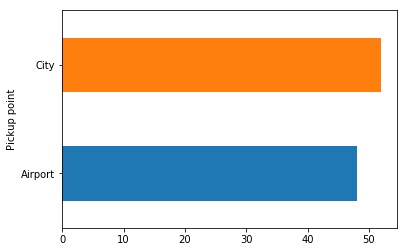

In [69]:
# Demand-supply Gap at PickUp point.

((GroupbyPickUp['Pickup point'].count())/len(uberrequest['Pickup point'])*100).plot(kind='barh')

###Demand is high at City rather than airport.

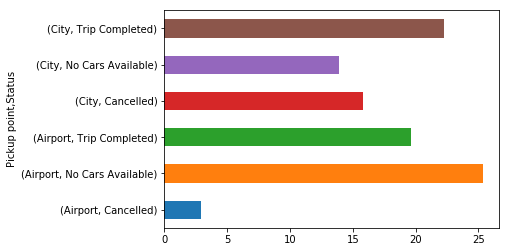

In [58]:
# Volume of requests /status 

GroupbyPickup_Status=uberrequest.groupby(['Pickup point', 'Status'])
((GroupbyPickup_Status['Pickup point'].count())/len(uberrequest['Status'])*100).plot(kind ='barh')

### Bar graph provides a clear view of the type of requests which need focus on . 

### Demand in City is higher than from Airport. 
### No Cars available is higher from Airport which 25% of the total requests.
### Requests getting cancelled are higher from City at 15.8 % of the total requests.
### No Cars available from City is at 13.89% of tht total requests.

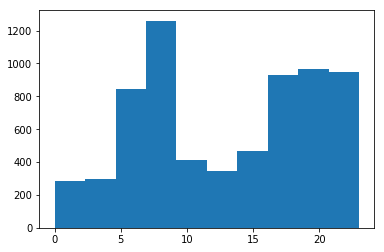

In [70]:
# Request Volume  against time 
plt.hist(uberrequest['Request Hour'])
plt.show()

### Histogram helps in providing the continous view of data by bucking time suitably. 
### High requests seen from 6-9 AM and 5-10 PM 

# 3.1. Data Analysis - Airport Pickup

In [12]:
# Airport Requests Analysis

Airport=uberrequest.loc[(uberrequest['Pickup point'] =='Airport')]
Airport_Completed=uberrequest.loc[(uberrequest['Pickup point'] =='Airport') & (uberrequest['Status']=='Trip Completed')]

(100, 800)

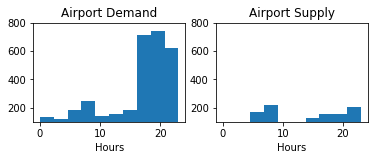

In [71]:
# Airport Pickup Analysis - Demand Vs Supply.

plt.figure(1)

# subplot 1
plt.subplot(2, 2, 1)
plt.title("Airport Demand")
plt.xlabel("Hours")
plt.hist(Airport['Request Hour'])
plt.ylim([100,800])

# subplot 2
plt.subplot(2, 2, 2)
plt.title("Airport Supply")
plt.xlabel("Hours")
plt.hist(Airport_Completed['Request Hour'])
plt.ylim([100,800])

### Histogram is chosen as the prefered report to show data segmented into buckets and continous.
### Huge gap seen during evening hours from 6 pm onwards. 
### Requests are high during evening hours compared to morning hours.


# 3.2 Data Analysis - City Pickup 

In [ ]:
# City Requests 
City=uberrequest.loc[(uberrequest['Pickup point'] =='City') ]
City_completed=uberrequest.loc[(uberrequest['Pickup point'] =='City') & (uberrequest['Status']=='Trip Completed')]

(100, 800)

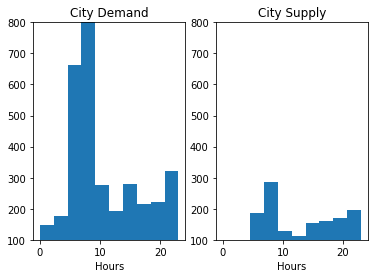

In [72]:
# City  Pickup Analysis - Demand Vs Supply.

plt.figure(2)

# subplot 1
plt.subplot(1, 2, 1)
plt.title("City Demand")
plt.xlabel("Hours")
plt.hist(City['Request Hour'])
plt.ylim([100,800])

# subplot 2
plt.subplot(1, 2, 2)
plt.title("City Supply")
plt.xlabel("Hours")
plt.hist(City_completed['Request Hour'])
plt.ylim([100,800])

### Huge gap seen in the morning hours - 6-9 AM .
### Requests are high during morning hours compared to evening hours. 


# 2.4 Data Analysis - Driver Performance 

In [74]:
# the number of trips completed by each drivers from  Airport.

groupbydriver=Airport_Completed.groupby('Driver id')
groupbydriver['Status'].count().sort_values(ascending=False)

### only 2 drivers make 10 trips during the period from Airport to City. 


Driver id
9.00      10
225.00    10
134.00     9
80.00      9
139.00     8
160.00     8
51.00      8
65.00      8
69.00      8
36.00      8
195.00     8
30.00      8
194.00     8
27.00      8
223.00     8
85.00      8
126.00     7
49.00      7
128.00     7
125.00     7
79.00      7
227.00     7
67.00      7
109.00     7
212.00     7
98.00      7
207.00     7
137.00     7
237.00     7
105.00     7
          ..
232.00     2
238.00     2
216.00     2
91.00      2
210.00     2
133.00     2
250.00     2
140.00     2
62.00      2
240.00     2
150.00     2
299.00     2
40.00      2
147.00     2
43.00      2
53.00      2
56.00      1
42.00      1
108.00     1
187.00     1
217.00     1
149.00     1
245.00     1
131.00     1
271.00     1
166.00     1
265.00     1
280.00     1
206.00     1
154.00     1
Name: Status, Length: 297, dtype: int64

In [54]:

# the number of trips completed by each drivers from City.

groupbydriver_city=City_completed.groupby('Driver id')
groupbydriver_city['Status'].count().sort_values(ascending=False)

#### atleast 7 drivers complete 10 trips from City to Airport. 
#### Indicates other drivers are busy with other travel requests most of the time. 

Driver id
184.00    10
23.00     10
25.00     10
197.00    10
22.00     10
274.00    10
107.00    10
204.00     9
185.00     9
70.00      9
119.00     9
254.00     8
233.00     8
182.00     8
176.00     8
114.00     8
43.00      8
261.00     8
251.00     8
118.00     8
35.00      8
289.00     8
215.00     8
284.00     8
188.00     8
78.00      8
86.00      8
73.00      8
221.00     8
20.00      7
          ..
123.00     3
65.00      3
66.00      3
72.00      3
90.00      3
277.00     3
129.00     3
169.00     2
189.00     2
275.00     2
143.00     2
295.00     2
135.00     2
241.00     2
93.00      2
227.00     2
103.00     2
41.00      2
104.00     2
138.00     2
117.00     2
21.00      2
122.00     2
31.00      2
165.00     1
260.00     1
192.00     1
153.00     1
136.00     1
300.00     1
Name: Status, Length: 299, dtype: int64